[-13.736488585714287, 0.14828742962168037, -13.77057364932251, -6.603951512621029]
[-13.570714507142856, 0.056918534783035324, -13.583817439519958, -17.438119699656667]
[-13.463410035714285, 0.29480427553366195, -13.53130002658219, -33.75317514282108]
[-13.734027107142857, 0.217241704643399, -13.782990165745339, -2.429551712707375]
[-13.576999921428571, 0.14427827408939534, -13.610339925405578, 13.427874388355097]
[-13.459191500000001, 0.2469610470797764, -13.515610448212382, 21.541553743790583]
[-13.718714235714286, 0.2277643045600163, -13.771520559951245, -18.866302179497463]
[-13.549171592857144, 0.14570026289146193, -13.584557271172477, -24.280072366741116]
[-13.503244771428571, 0.15370851995348397, -13.541485085497088, -24.20842693288486]
[-13.696674742857143, 0.16356897147366706, -13.734239649754624, -27.970469216726467]
[-13.564695092857143, 0.166719601505628, -13.604002610959123, -9.27973256995912]
[-13.534371049999999, 0.19195327702065781, -13.57747169168197, -25.6552132881422

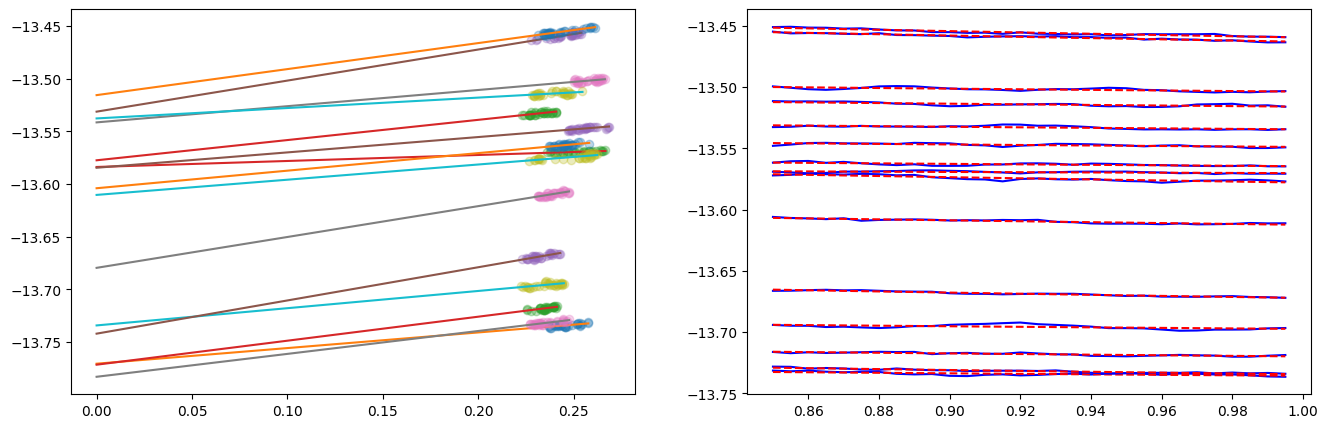

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys_names = ['../data/expriment_2_1/C2H4_tau0ecp', '../data/expriment_2_1/C4H4/C2H4_tau0ecp']
sys_names = ['../data/expriment_2_1/C2H4_tau0ecp', 
            '../data/expriment_2_1/C2H4_tau15ecp',
            '../data/expriment_2_1/C2H4_tau30ecp',
            '../data/expriment_2_1/C2H4_tau45ecp',
            '../data/expriment_2_1/C2H4_tau60ecp',
            # '../data/expriment_2_1/C2H4_tau70ecp',
            # '../data/expriment_2_1/C2H4_tau80ecp',
            # '../data/expriment_2_1/C2H4_tau85ecp',
            # '../data/expriment_2_1/C2H4_tau90ecp'
            ]#,'../data/expriment_2_1/C2H4_tau20ecp','../data/expriment_2_1/C2H4_tau40ecp']# ,'../data/expriment_2_1/N_5_2_ecp'

N_id = 170
ite = 20

ckpt_restore_filenames = []
for sys_name in sys_names:
    files = os.listdir(sys_name)
    for file in files:
        if 'ferminet_2023' in file and os.path.exists(sys_name+'/'+file+'/train_stats.csv'):
            ckpt_restore_filenames.append(sys_name+'/'+file+'/train_stats.csv')
    ckpt_restore_filenames.sort()

E = []
T = []
Var = []
S = []
S_numpy = []
Verli = []
for file_name in ckpt_restore_filenames[:]:
    df = pd.read_csv(file_name)
    S_index = []
    for col in df.columns:
        if "S_" in col:
            S_index.append(col)
    E.append(df['E_mean_clip'])
    Var.append(df['E_var_clip'])

Es = pd.DataFrame(E, index=[i for i in range(len(E))]).T.rolling(window=100, center=True, min_periods=1).mean()[::ite]
E_vars = pd.DataFrame(Var, index=[i for i in range(len(Var))]).T.rolling(window=100, center=True, min_periods=1).mean()[::ite]
plt.figure(figsize=(16, 5))
E_out = []
for i in range(Es.shape[1]):
# i=2
    x = E_vars[i].values[N_id:]
    y = Es[i].values[N_id:]
    # 线性拟合
    p = np.polyfit(x,y,1)
    x1 = np.linspace(0, x.max(),10)
    y_fit = np.polyval(p,x1)

    plt.subplot(121)
    plt.plot(x,y,'o', alpha=0.3)
    plt.plot(x1,y_fit)
    
    def func(x, a, b, c):
        return a * x**(-b) + c
    plt.subplot(122)
    xdata = Es[i].index[N_id:]/4000
    ydata = Es[i].values[N_id:]
    plt.plot(xdata,ydata,'b-')
    popt, pcov = curve_fit(func, xdata, ydata, maxfev = 10000)
    #popt数组中，三个值分别是待求参数a,b,c
    y2 = [func(i, popt[0],popt[1],popt[2]) for i in xdata]
    plt.plot(xdata,y2,'r--')
    print([y[-1], p[0], p[1],popt[2]])
    E_out.append([y[-1], p[1],popt[2]])

In [2]:
Es = np.array(E_out)

In [3]:
(Es-Es[0])*27.21

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.51094476e+00,  5.08189793e+00, -2.94812884e+02],
       [ 7.43084966e+00,  6.51097026e+00, -7.38768384e+02],
       [ 6.69802780e-02, -3.37870795e-01,  1.13591263e+02],
       [ 4.33990984e+00,  4.36018395e+00,  5.45094027e+02],
       [ 7.54564192e+00,  6.93790565e+00,  7.65878602e+02],
       [ 4.83664948e-01, -2.57667639e-02, -3.33675729e+02],
       [ 5.09715762e+00,  5.06176607e+00, -4.80991995e+02],
       [ 6.34689073e+00,  6.23382055e+00, -4.79042422e+02],
       [ 1.08339040e+00,  9.88698996e-01, -5.81412860e+02],
       [ 4.67474145e+00,  4.53263115e+00, -7.28117487e+01],
       [ 5.49990111e+00,  5.25457461e+00, -5.18411505e+02],
       [ 1.75383168e+00,  7.76080656e-01, -1.99593414e+02],
       [ 3.41048678e+00,  2.47617578e+00,  1.16463326e+02],
       [ 6.00006783e+00,  6.33602025e+00,  2.80159768e+01]])

In [4]:
Es1 = Es.reshape(5,3,3)

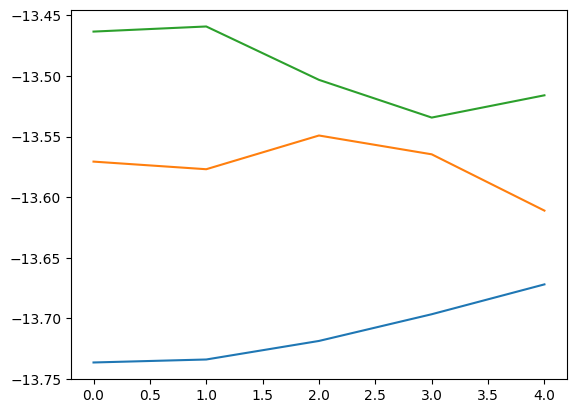

In [6]:
plt.plot(Es1[:,0,0])
plt.plot(Es1[:,1,0])
plt.plot(Es1[:,2,0])